# chapter 14 in chapter exercises

In [2]:
# import libraries 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.font_manager import FontProperties # for making tables
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM


In [3]:
# define global figure properties 
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 14.3: Critical F by df's

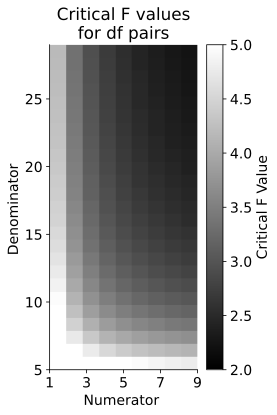

In [5]:
# define the degrees of freedom
df1_values = np.arange(1,10)
df2_values = np.arange(5,30)

# Create a 2D numpy array to store the critical F values
critFvals = np.zeros((len(df2_values),len(df1_values)))

# critical F values for each df pair
for i, df1 in enumerate(df1_values):
  for j, df2 in enumerate(df2_values):
    critFvals[j,i] = stats.f.ppf(.95, df1, df2)


# Plot the matrix as a heatmap
plt.figure(figsize=(4,6))
plt.imshow(critFvals, origin='lower', cmap='gray', interpolation='nearest',aspect='auto',
           extent=[df1_values[0],df1_values[-1],df2_values[0],df2_values[-1]],vmin=2,vmax=5)
plt.colorbar(label='Critical F Value')
plt.xlabel(r'Numerator ')
plt.ylabel(r'Denominator ')
plt.xticks(df1_values[::2])
plt.title(f'Critical F values\nfor df pairs',loc='center')

plt.tight_layout()
plt.show()
     